### Importing the required libraries and packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

### Reading the dataset

In [2]:
sales_data = pd.read_csv('Champagne Sales.csv')
sales_data['Month'] = pd.to_datetime(sales_data['Month'])

#Here are we are setting the index of the dataframe to the variable
sales_data.set_index('Month', inplace = True)
sales_data

,Champagne sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946
...,...
1972-05-01,4618
1972-06-01,5312
1972-07-01,4298


### Plotting the series

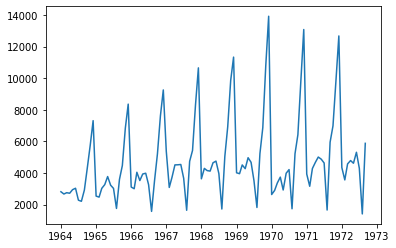

In [3]:
plt.plot(sales_data)
plt.show()

**Here we can observe that there is a seasonality associated with data as every year there is a spike in increasing sales**

### Splitting the dataset in to train and test data

In [4]:
train_data = sales_data.iloc[0:85]
test_data = sales_data.iloc[-20:]

## ARMA Model

We can use the ARMA class to create an MA model and setting a zeroth-order AR model. We must specify the order of the MA model in the order argument.

### Building the Moving Average Model

In [5]:
model = ARMA(np.asarray(train_data['Champagne sales']), order=(0, 1))
arma_model = model.fit()
arma_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                   85
Model:                     ARMA(0, 1)   Log Likelihood                -773.692
Method:                       css-mle   S.D. of innovations           2164.157
Date:                Sat, 19 Jun 2021   AIC                           1553.384
Time:                        05:38:03   BIC                           1560.712
Sample:                             0   HQIC                          1556.331
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4634.8904    390.721     11.862      0.000    3869.092    5400.689
ma.L1.y        0.6720      0.115      5.849      0.000       0.447       0.897
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.4881           +0.0000j            1.4881            0.5000
-----------------------------------------------------------------------------
"""

### Making Predictions 

In [6]:
forecast_arma = arma_model.predict()
forecast_arma

array([4634.89036119, 3792.38084788, 3974.73127402, 3858.41455015,
       3888.30407167, 4008.23088298, 3984.59215553, 3493.1387672 ,
       3774.7694347 , 4062.06620906, 4795.42523377, 5285.72560131,
       5996.51367746, 2312.79133335, 4743.89536106, 3483.81140582,
       4488.51911703, 4156.0706083 , 4012.56168334, 3973.25497656,
       3146.88855357, 4936.0258105 , 4324.40431246, 6324.05226804,
       6001.05195047, 2694.09002153, 4844.4970452 , 4098.96421986,
       4247.83653598, 4426.00504136, 4339.20248942, 3909.65529042,
       3064.63419375, 4946.27690504, 4812.78697873, 6517.33405796,
       6473.95776294, 3896.37954529, 4091.65106876, 4383.7930352 ,
       4722.39076845, 4498.88170228, 4661.85026609, 3963.65280334,
       3075.38802814, 5752.85455974, 4416.58478653, 7253.99310225,
       6917.71361455, 2427.5293385 , 5887.83364609, 3469.73648194,
       5072.54608219, 4348.91905732, 4906.43687256, 4002.23518888,
       3103.22108714, 5941.8016094 , 5293.59366863, 7702.21793

### Plotting the actual data series and the ARMA series

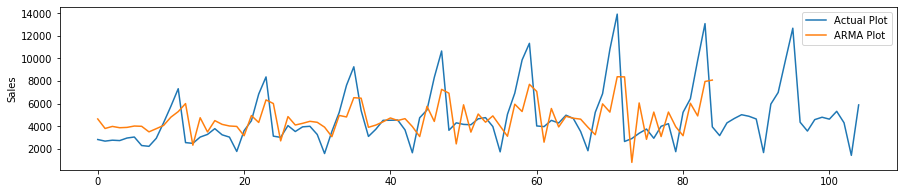

In [7]:
plt.figure(figsize = (15,3))
plt.ylabel('Sales')
plt.plot(np.asarray(sales_data['Champagne sales']))
plt.plot(forecast_arma)
plt.legend(['Actual Plot', 'ARMA Plot'])
plt.show()

## AR Model

Arima model take order as one of the paramenter and it has three values p,d,q

p = Order of AR

d - order of intergration

q - order of MA

set d and q = 0 as build AR model

### Building the Auto Regression(AR) Model

In [8]:
arima = ARIMA(np.asarray(sales_data['Champagne sales']),order = (1,0,0)) #AR with lag 1
ar_model = arima.fit()

In [21]:
ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  105
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -959.613
Date:                Fri, 18 Jun 2021   AIC                           1925.226
Time:                        20:25:18   BIC                           1933.188
Sample:                             0   HQIC                          1928.452
                                - 105                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4761.1524    589.700      8.074      0.000    3605.362    5916.942
ar.L1          0.4615      0.065      7.130      0.000       0.335       0.588
sigma2      5.087e+06   6.35e+05      8.016      0.000    3.84e+06    6.33e+06
===================================================================================
Ljung-Box (Q):                      310.79   Jarque-Bera (JB):                 5.84
Prob(Q):                              0.00   Prob(JB):                         0.05
Heteroskedasticity (H):               3.72   Skew:                             0.44
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Making Predictions

In [9]:
forecast_ar = ar_model.predict()
forecast_ar

array([4761.1523797 , 3862.94157473, 3796.94255716, 3835.24967924,
       3819.55760514, 3923.40221321, 3964.94005644, 3616.9452365 ,
       3584.6380251 , 3912.32545501, 4548.7775196 , 5223.99823786,
       5938.4491414 , 3736.48191868, 3706.02083364, 3962.63239848,
       4071.09232247, 4306.4734341 , 4054.47718517, 3961.24780371,
       3375.56421418, 4222.93621605, 4628.62248492, 5719.68316706,
       6420.74965444, 4000.47798898, 3951.09410869, 4431.54849537,
       4189.70594146, 4380.78002032, 4403.3950683 , 4068.32313292,
       3289.71933817, 4192.01359942, 4968.7712678 , 6077.83168201,
       6834.74349196, 5044.4624488 , 3988.93969919, 4279.70460179,
       4647.08374857, 4649.85293812, 4658.62203836, 4254.32036426,
       3322.02654957, 4750.92835665, 5068.92362314, 6400.90379601,
       7479.50312519, 4240.47441652, 4544.62373528, 4480.93237566,
       4465.70183314, 4708.46745023, 4757.38979893, 4393.70290488,
       3358.94907689, 4893.5416184 , 5758.45182074, 7113.50857

### Plotting the actual data series and the AR series

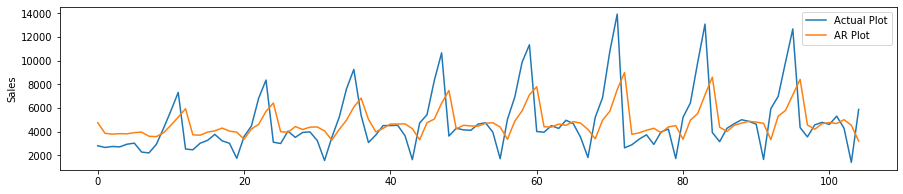

In [10]:
plt.figure(figsize = (15,3))
plt.ylabel('Sales')
plt.plot(np.asarray(sales_data['Champagne sales']))
plt.plot(forecast_ar)
plt.legend(['Actual Plot', 'AR Plot'])
plt.show()

## MA(Moving Average Model)

In [11]:
arima = ARIMA(np.asarray(sales_data['Champagne sales']),order = (0,0,3)) #MA model with 3 lag
ma_model = arima.fit()
ma_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  105
Model:                 ARIMA(0, 0, 3)   Log Likelihood                -954.542
Date:                Sat, 19 Jun 2021   AIC                           1919.085
Time:                        05:40:59   BIC                           1932.355
Sample:                             0   HQIC                          1924.462
                                - 105                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4761.4532    653.467      7.286      0.000    3480.682    6042.224
ma.L1          0.7284      0.135      5.379      0.000       0.463       0.994
ma.L2          0.2217      0.118      1.873      0.061      -0.010       0.454
ma.L3          0.2358      0.153      1.541      0.123      -0.064       0.536
sigma2      4.576e+06   6.09e+05      7.519      0.000    3.38e+06    5.77e+06
===================================================================================
Ljung-Box (Q):                      268.55   Jarque-Bera (JB):                 2.39
Prob(Q):                              0.00   Prob(JB):                         0.30
Heteroskedasticity (H):               3.88   Skew:                            -0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
#Making Predictions
forecast_ma = ma_model.predict()
forecast_ma

array([4761.45321777, 3640.03518738, 3659.14545081, 3648.04605765,
       3716.15339212, 3814.01838914, 3827.54368634, 3302.40350583,
       3450.78738303, 3776.37329478, 4769.67867054, 5476.19190037,
       6440.16443575, 2565.84770276, 4262.80374241, 2925.92657379,
       4714.50832951, 3863.05405348, 4172.50281695, 3566.25365758,
       3042.14381667, 4493.51820328, 4443.62338876, 6631.46551538,
       6544.54348269, 3209.29788957, 4259.47993675, 3752.33469013,
       4499.35727191, 4250.89128848, 4389.74381864, 3747.22620626,
       2864.85610604, 4495.96514523, 4916.5311708 , 7041.13909407,
       7139.94575363, 4602.71574969, 3788.7332125 , 3957.85258612,
       4793.62508762, 4668.77963155, 4737.41810379, 3885.5736821 ,
       2859.20426419, 5380.03191954, 4684.29512661, 7859.18286531,
       7611.01521748, 3339.00356798, 5232.00154698, 3249.40209844,
       5382.03803355, 4165.09012008, 5232.25277622, 3795.42547425,
       3109.63799353, 5414.93727492, 5800.16850919, 8508.33810

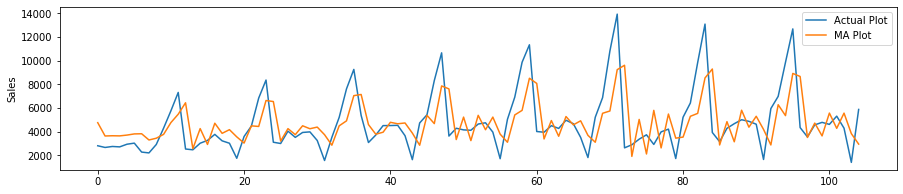

In [14]:
#Plotting the actual plot vs MA Plot
plt.figure(figsize = (15,3))
plt.ylabel('Sales')
plt.plot(np.asarray(sales_data['Champagne sales']))
plt.plot(forecast_ma)
plt.legend(['Actual Plot', 'MA Plot'])
plt.show()